In [2]:
pip install country_converter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import country_converter as coco
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import joblib

In [4]:
DS_job_salaries_data = pd.read_csv('Data Science Job Salaries.csv')   # data gathered from ai-jobs.net
DS_job_salaries_data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
DS_job_salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
DS_job_salaries_data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
print(DS_job_salaries_data.shape)
print(DS_job_salaries_data.columns)
print(DS_job_salaries_data.dtypes)

(607, 12)
Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')
Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [8]:
if 'Unnamed: 0' in DS_job_salaries_data.columns:
    DS_job_salaries_data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
print(DS_job_salaries_data.shape)

(607, 11)


In [10]:
#checking duplicates
same_value_rows = DS_job_salaries_data.apply(lambda row: row.nunique() == 1, axis=1)
print(DS_job_salaries_data[same_value_rows])

Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


In [11]:
DS_job_salaries_data.columns = DS_job_salaries_data.columns.str.strip().str.lower().str.replace(" ", "_")

In [12]:
if DS_job_salaries_data.isnull().sum().sum() > 0:
    print(DS_job_salaries_data.isnull().sum())
    print("Null Values Present")
else:
    print("No Null Values in the Dataset")

No Null Values in the Dataset


In [13]:
experience_map = {'SE': 'Senior', 'MI': 'Mid', 'EN': 'Entry', 'EX': 'Executive'}

# Clean and map
DS_job_salaries_data['experience_level'] = (
    DS_job_salaries_data['experience_level']
    .astype(str)
    .str.strip()
    .map(experience_map)
)

In [14]:
# Map Employment Types
employment_map = {'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'}
DS_job_salaries_data['employment_type'] = DS_job_salaries_data['employment_type'].map(employment_map)

In [15]:
# Map Company Sizes
company_map = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
DS_job_salaries_data['company_size'] = DS_job_salaries_data['company_size'].map(company_map)

In [16]:
DS_job_salaries_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,USD,154000,US,100,US,Medium
603,2022,Senior,Full-time,Data Engineer,126000,USD,126000,US,100,US,Medium
604,2022,Senior,Full-time,Data Analyst,129000,USD,129000,US,0,US,Medium
605,2022,Senior,Full-time,Data Analyst,150000,USD,150000,US,100,US,Medium


In [17]:
# Rename and Transform Remote Ratio
job_type_map = {100: 'remote', 50: 'hybrid', 0: 'onsite'}
DS_job_salaries_data.rename(columns={'remote_ratio': 'job_type'}, inplace=True)
DS_job_salaries_data['job_type'] = DS_job_salaries_data['job_type'].map(job_type_map)

In [18]:
cc = coco.CountryConverter()
DS_job_salaries_data['employee_residence'] = cc.convert(names=DS_job_salaries_data['employee_residence'], to='name_short')
DS_job_salaries_data['company_location'] = cc.convert(names=DS_job_salaries_data['company_location'], to='name_short')

In [19]:
year_count = DS_job_salaries_data['work_year'].value_counts().sort_index()
year_count

2020     72
2021    217
2022    318
Name: work_year, dtype: int64

(-0.5, 2999.5, 1999.5, -0.5)

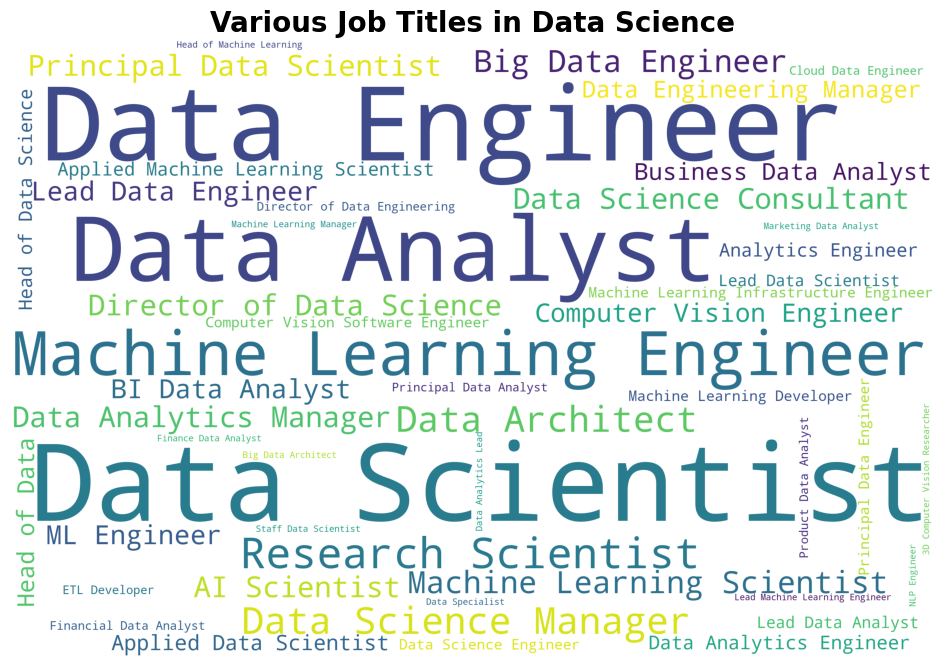

In [20]:
word_cloud_list=Counter(DS_job_salaries_data.job_title)

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color="white",
    collocations= False,
    stopwords=STOPWORDS,
).generate_from_frequencies(word_cloud_list)

plt.figure(figsize=(15,8))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
plt.imshow(wordcloud)
plt.axis("off")

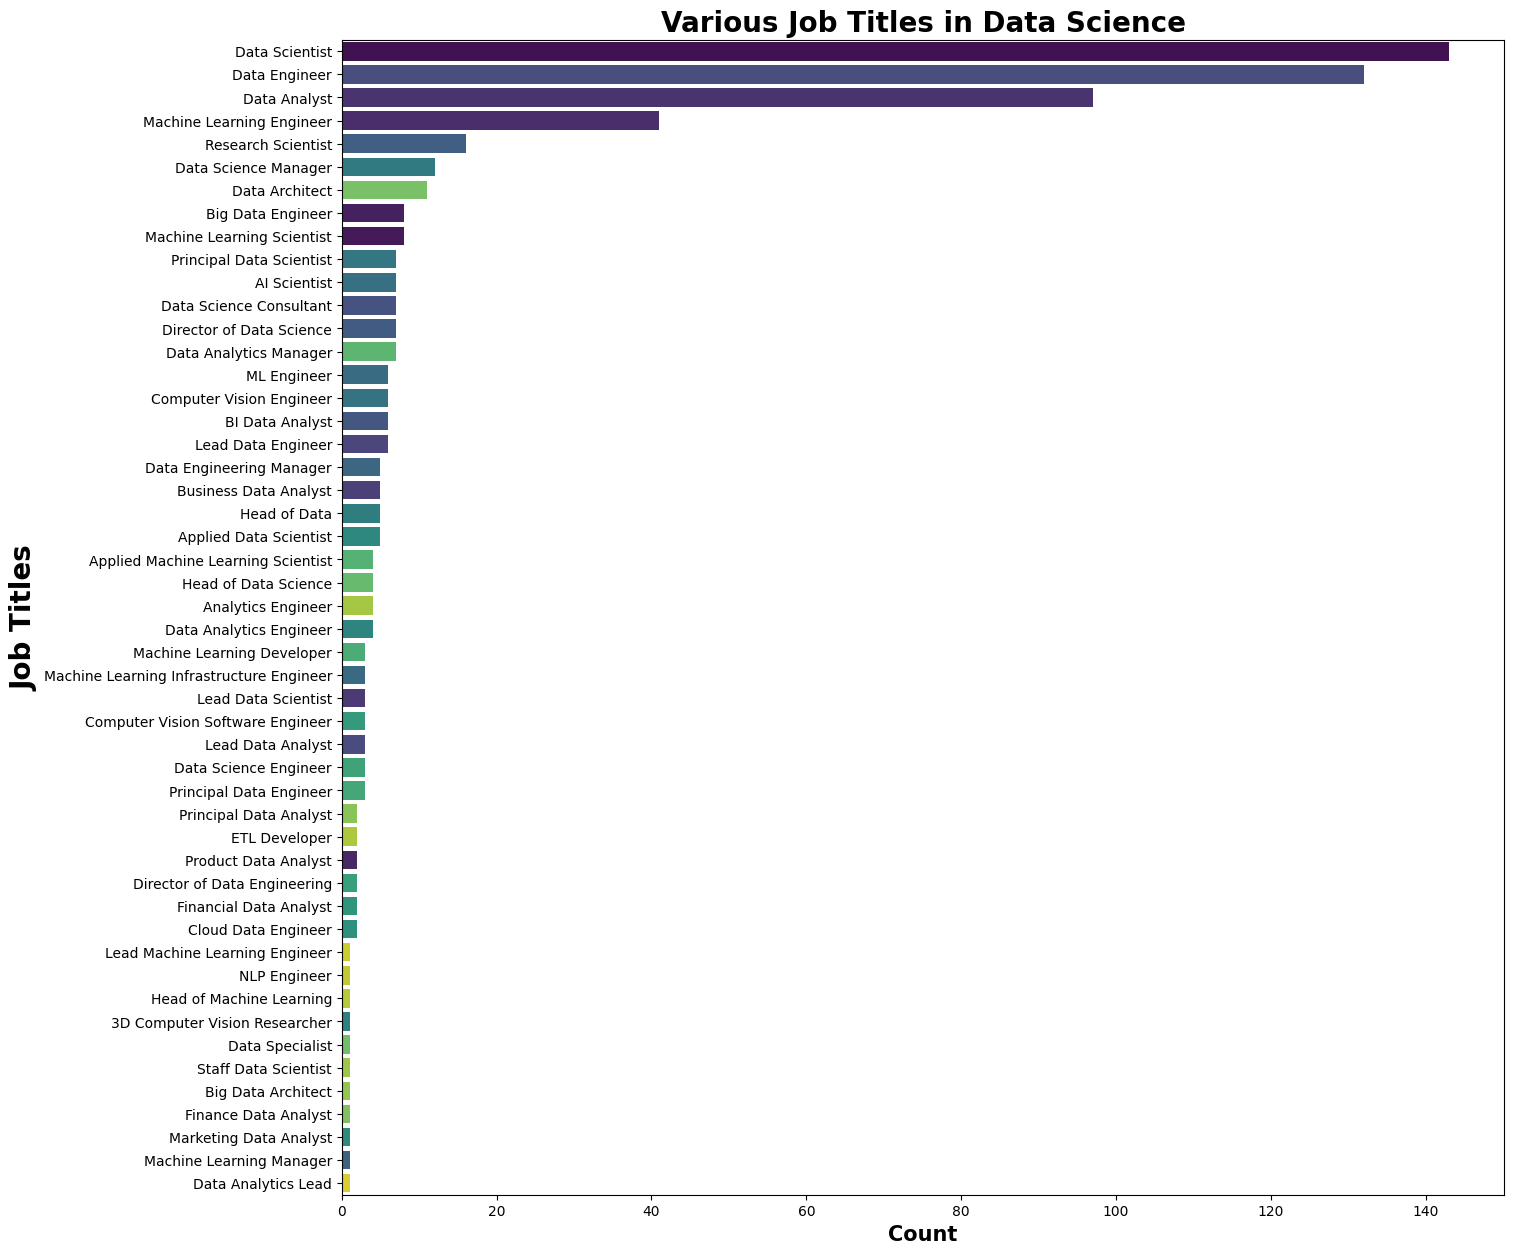

In [21]:
plt.figure(figsize=(15,15))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.countplot(y='job_title', data=DS_job_salaries_data, order=DS_job_salaries_data['job_title'].value_counts().index, hue = 'job_title', palette='viridis')
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')
plt.show()

## Data Distibution (Univariate Analysis)

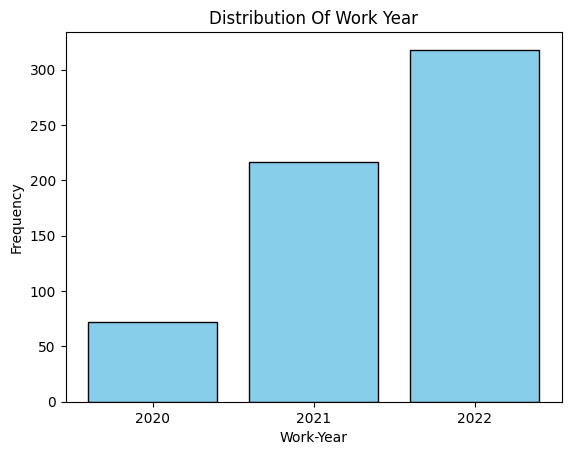

In [22]:
year_count = DS_job_salaries_data['work_year'].value_counts().sort_index()
plt.bar(year_count.index, year_count.values , color='skyblue', edgecolor='black')
plt.title("Distribution Of Work Year")
plt.xlabel('Work-Year')
plt.ylabel('Frequency')
plt.xticks(ticks=year_count.index)
plt.show()

# The Dataset contains values from 2020 - 2022 with 2022 records

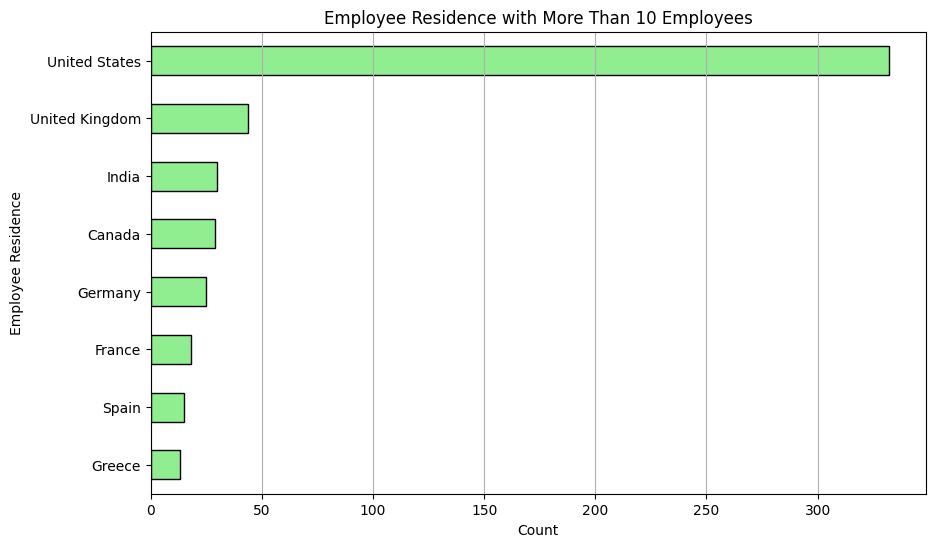

In [23]:
residence_count = DS_job_salaries_data['employee_residence'].value_counts()

filtered_residence_count = residence_count[residence_count > 10]

plt.figure(figsize=(10, 6))
filtered_residence_count.sort_values().plot(kind='barh', color='lightgreen', edgecolor='black')  # horizontal bar
plt.title('Employee Residence with More Than 10 Employees')
plt.xlabel('Count')
plt.ylabel('Employee Residence')
plt.grid(axis='x')
plt.show()

# United States has more employees of Data Science field as compared with other countries.

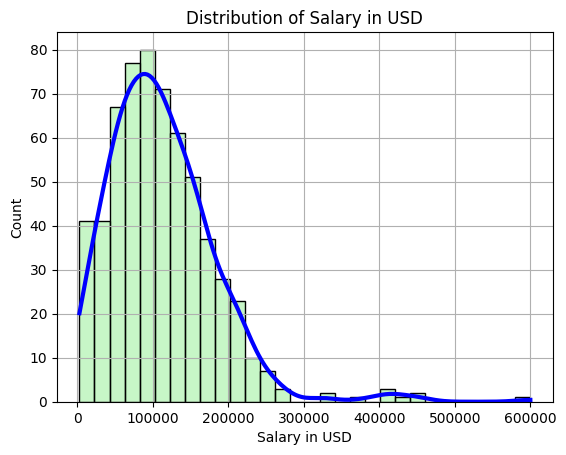

In [24]:
sns.set_palette('winter')
sns.histplot(DS_job_salaries_data['salary_in_usd'], bins=30, color='lightgreen', edgecolor='black', kde=True)
plt.setp(plt.gca().lines, color='blue', linewidth=3)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Very few professionals has salary more than 300000

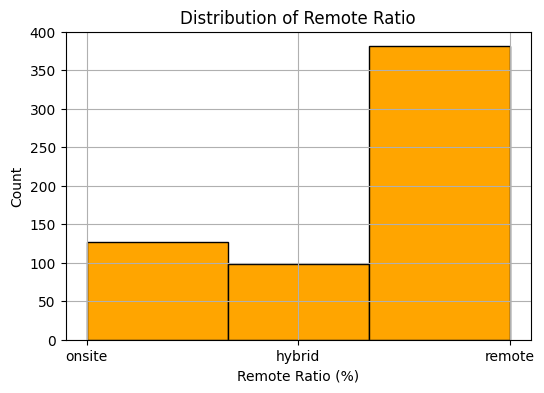

In [25]:
plt.figure(figsize=(6, 4))
plt.hist(DS_job_salaries_data['job_type'], bins=3, color='orange', edgecolor='black')
plt.title('Distribution of Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Remote jobs are more for data science field

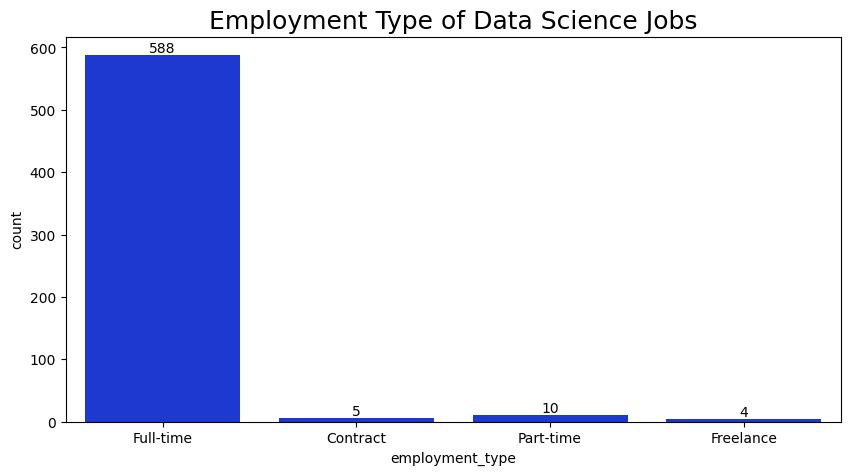

In [26]:
plt.figure(figsize=(10,5))
plt.title('Employment Type of Data Science Jobs', fontsize=18)
ax = sns.countplot (x='employment_type', data=DS_job_salaries_data)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

## Salary Comparison Across Groups

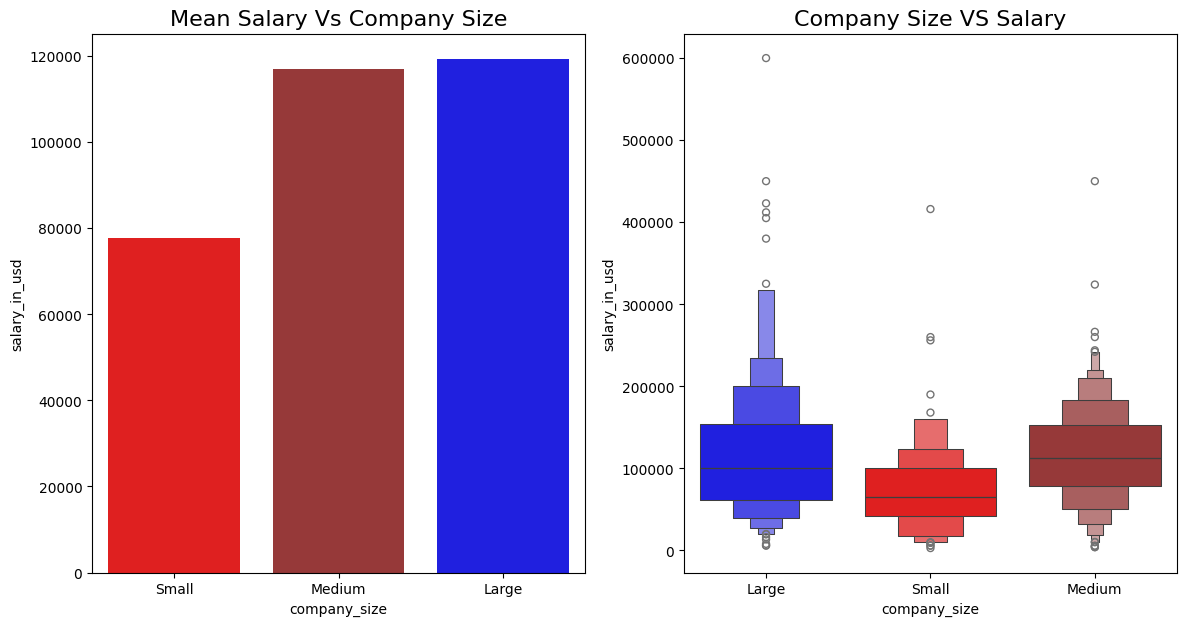

In [27]:
mean_s_cmp_size = DS_job_salaries_data.groupby('company_size')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(14, 7))
sns.set_palette('spring')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_cmp_size.index, y=mean_s_cmp_size, hue = mean_s_cmp_size.index, palette={'Small':'red', 'Medium':'brown', 'Large':'blue'})
ax.set_title('Mean Salary Vs Company Size',fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
sns.set_palette('Set2')
ax = sns.boxenplot(
    data=DS_job_salaries_data,
    x='company_size',
    y='salary_in_usd',
    hue='company_size',
    palette={'Small': 'red', 'Medium': 'brown', 'Large': 'blue'}
)
ax.set_title('Company Size VS Salary', fontdict={'fontsize':16})
plt.show()

In [28]:
job_title_salary = DS_job_salaries_data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

job_title_salary['short_title'] = job_title_salary['job_title'].apply(lambda x: x[:10] + '...' if len(x) > 10 else x)

fig = px.scatter(
    job_title_salary,
    x='short_title',
    y='salary_in_usd',
    hover_data={'job_title': True, 'salary_in_usd': True},
    labels={'short_title': 'Job Title'},
    title="Mean Salary vs Job Title"
)

fig.update_traces(marker=dict(color='blue', opacity=0.8, line=dict(width=3, color='black')))
fig.show()

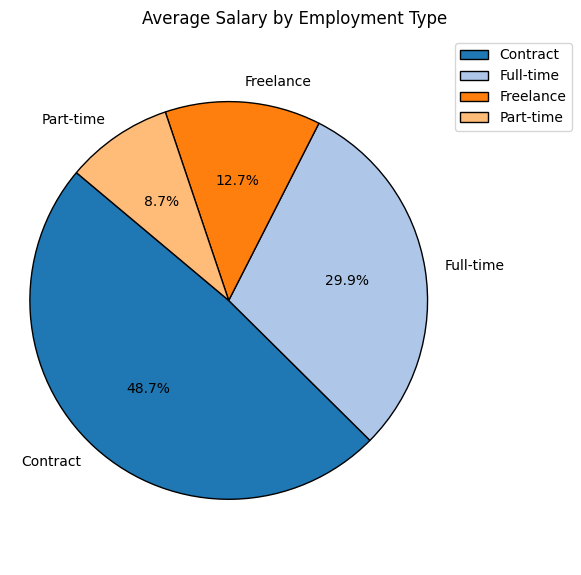

In [29]:
emp_type_salary = DS_job_salaries_data.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(6, 6))
colors = plt.cm.tab20.colors

plt.pie(
    emp_type_salary['salary_in_usd'],
    labels=emp_type_salary['employment_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.suptitle('Average Salary by Employment Type', fontsize=12, y=0.95)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.axis('equal')
plt.tight_layout()
plt.show()

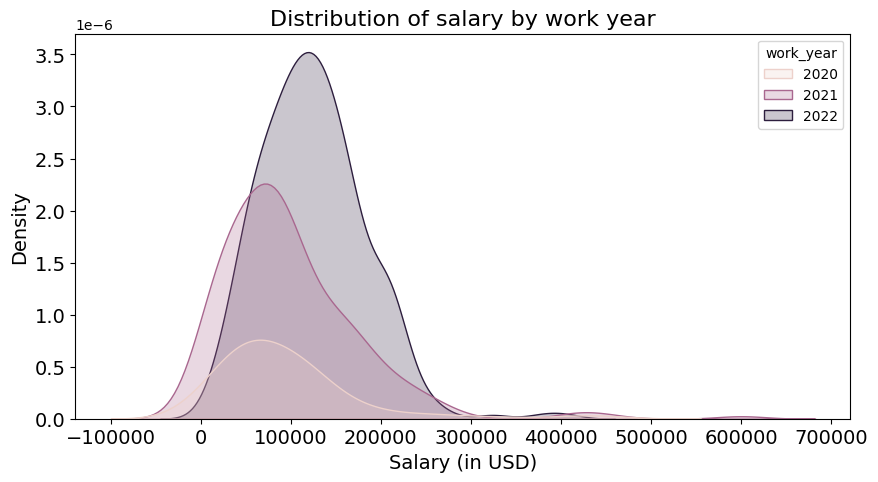

In [30]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=DS_job_salaries_data, x='salary_in_usd', hue='work_year', fill=True)
plt.title("Distribution of salary by work year", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Bivariate Analysis

In [31]:
fig1 = px.scatter(
    DS_job_salaries_data,
    x='job_type',
    y='salary_in_usd',
    color='job_type',
    title='Job Type vs Salary in USD',
    labels={'job_type': 'Remote Ratio (%)', 'salary_in_usd': 'Salary (USD)'}
)
fig1.update_traces(marker=dict(size=8, opacity=0.6))
fig1.update_layout(title_font_size=20)
fig1.show()

In [32]:
size_level_pivot = pd.crosstab(DS_job_salaries_data['company_size'],DS_job_salaries_data['experience_level'])
display(size_level_pivot)

experience_level,Entry,Executive,Mid,Senior
company_size,,,,
Large,29,11,86,72
Medium,30,12,98,186
Small,29,3,29,22


<Figure size 1000x500 with 0 Axes>

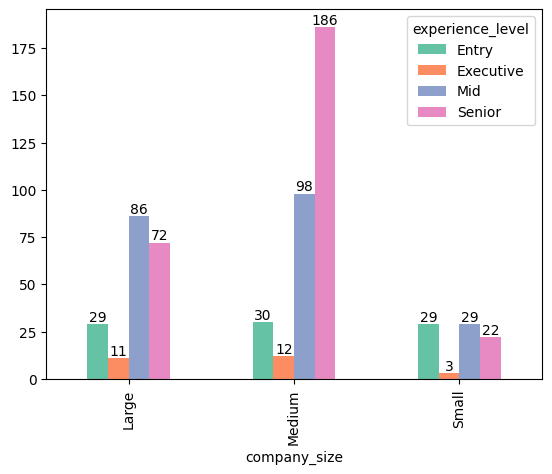

In [33]:
plt.figure(figsize=(10,5))
ax=size_level_pivot.plot.bar()
for i in ax.containers:
    ax.bar_label(i)

# Medium-Sized companies hire more Data professionals in every experience level although there are significantly more Senior-level/Expert employees compared to other levels.

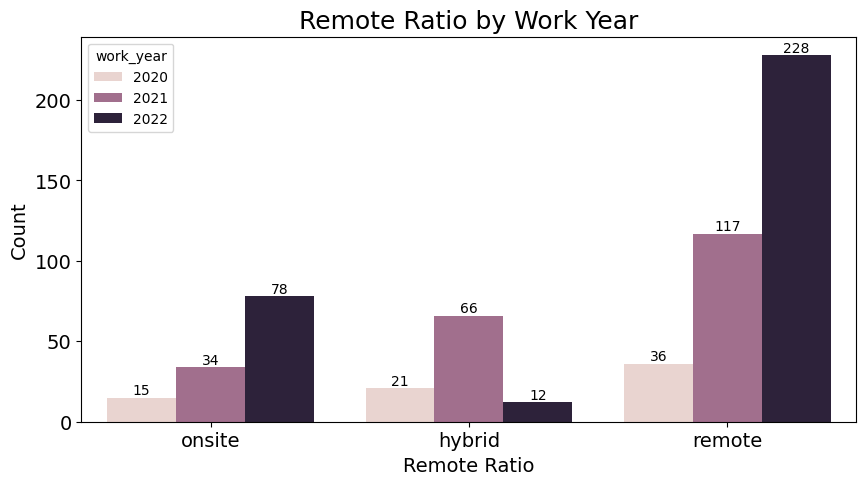

In [34]:
plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18)
ax = sns.countplot(x='job_type', data=DS_job_salaries_data, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Full-Time Remote Jobs are More

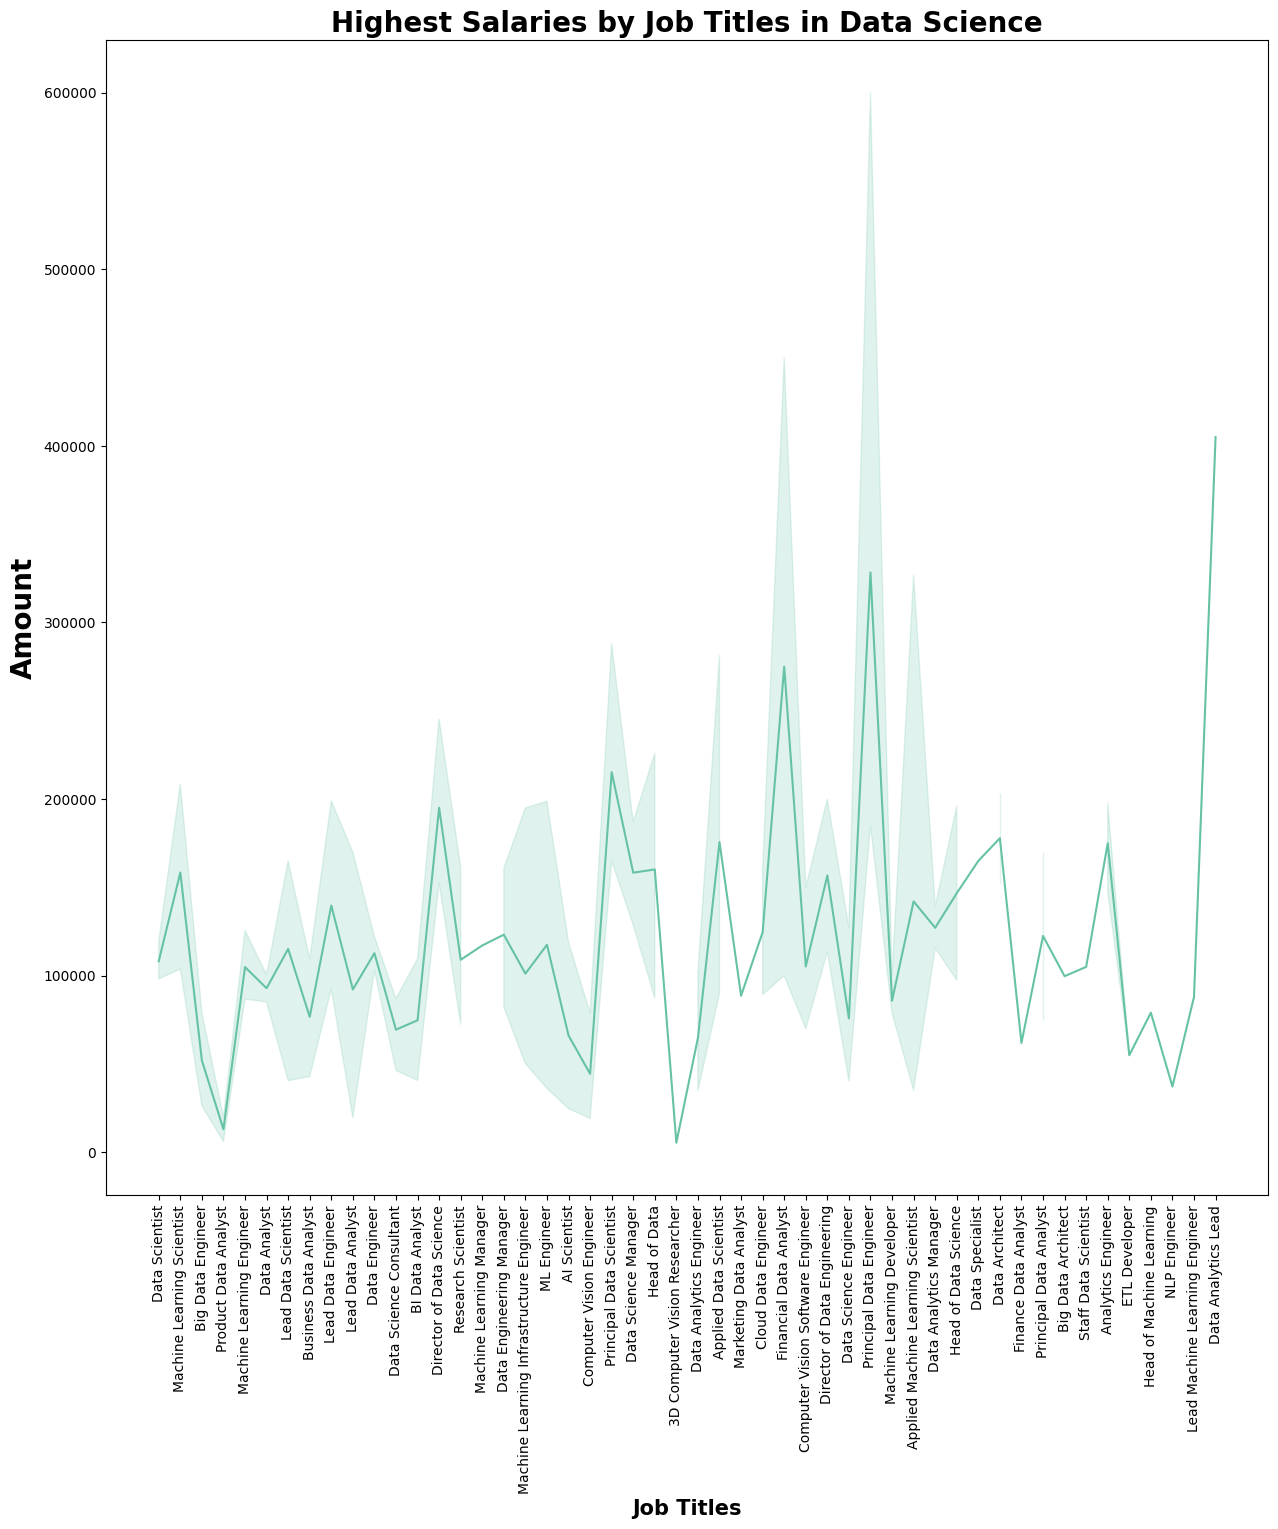

In [35]:
plt.figure(figsize=(15,15))
plt.title('Highest Salaries by Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='job_title', data=DS_job_salaries_data)
plt.xlabel('Job Titles', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

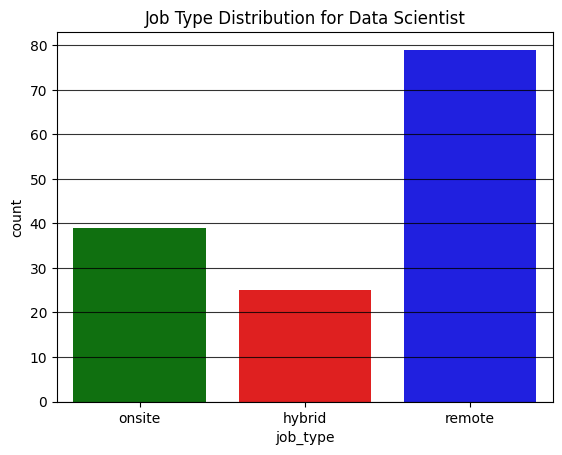

In [36]:
data_scientist_data = DS_job_salaries_data[DS_job_salaries_data['job_title'] == 'Data Scientist']
sns.countplot(data = data_scientist_data, x = 'job_type', hue='job_type', palette= {'onsite': 'green', 'hybrid': 'red', 'remote': 'blue'})
plt.title('Job Type Distribution for Data Scientist')
plt.xlabel('job_type')
plt.ylabel('count')
plt.grid(axis='y', linestyle='-', color='black', alpha=0.8)
plt.show()

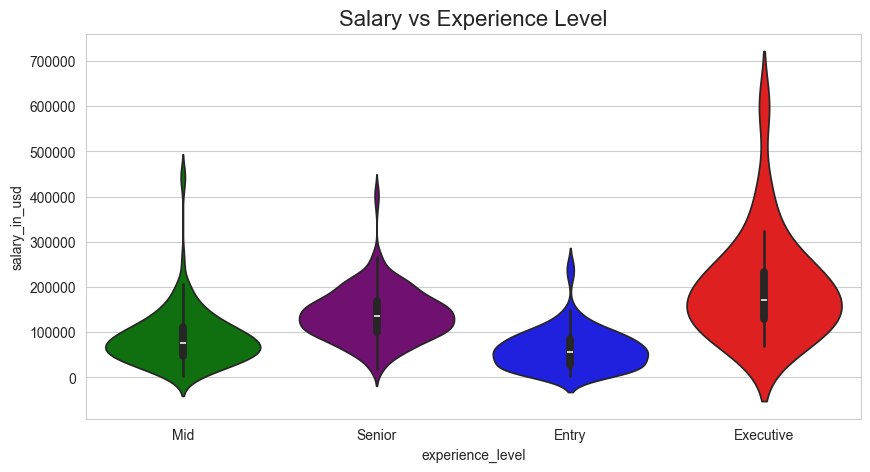

In [37]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.set_palette('spring')
sns.violinplot(data=DS_job_salaries_data, x='experience_level', y='salary_in_usd', hue='experience_level', palette={'Entry':'blue', 'Executive':'red', 'Mid':'green', 'Senior':'purple'})
plt.title("Salary vs Experience Level", fontdict={'fontsize': 16})
plt.show()

In [38]:
job_title_counts = DS_job_salaries_data['job_title'].value_counts()
common_job_titles = job_title_counts[job_title_counts > 1].index

top_ds_roles_that_happened_gt_1 = (
    DS_job_salaries_data[DS_job_salaries_data['job_title'].isin(common_job_titles)].groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False).head(10)
    )
top_ds_roles_that_happened_gt_1

job_title
Principal Data Engineer       328333.333333
Financial Data Analyst        275000.000000
Principal Data Scientist      215242.428571
Director of Data Science      195074.000000
Data Architect                177873.909091
Applied Data Scientist        175655.000000
Analytics Engineer            175000.000000
Head of Data                  160162.600000
Machine Learning Scientist    158412.500000
Data Science Manager          158328.500000
Name: salary_in_usd, dtype: float64

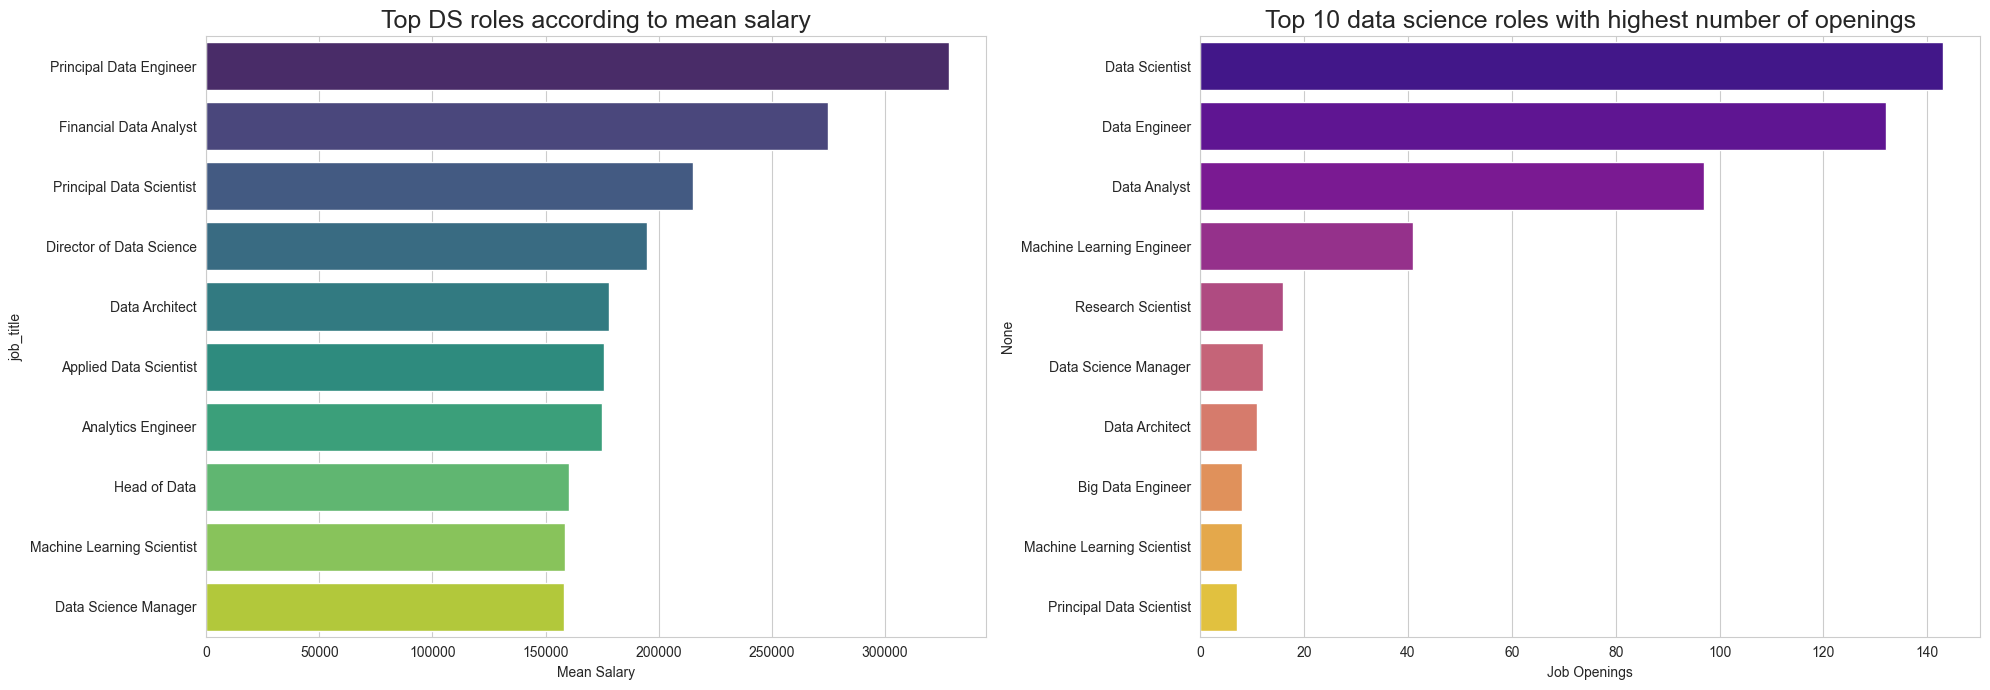

In [39]:
plt.figure(figsize=(20, 7))

# Top 10 data science roles according to mean salary
plt.subplot(1, 2, 1)
top_ds_roles = top_ds_roles_that_happened_gt_1
sns.barplot(y=top_ds_roles.index, x=top_ds_roles,  hue=top_ds_roles.index, palette='viridis')
plt.xlabel('Mean Salary')
plt.title('Top DS roles according to mean salary', fontdict={'fontsize': 18})

# Top 10 data science roles with highest number of openings
plt.subplot(1, 2, 2)
top_dr = DS_job_salaries_data['job_title'].value_counts()[:10]
sns.barplot(x=top_dr, y=top_dr.index,  hue=top_dr.index, palette='plasma')
plt.xlabel('Job Openings')
plt.title('Top 10 data science roles with highest number of openings', fontdict={'fontsize': 18})

plt.tight_layout()
plt.show()

In [40]:
loc_sal_pivot = pd.pivot_table(data=DS_job_salaries_data,index=['company_location'],values=['salary_in_usd'], aggfunc='mean').sort_values(by=['salary_in_usd'],ascending=False)
display(loc_sal_pivot)

,salary_in_usd
company_location,
Russia,157500.000000
United States,144055.261972
New Zealand,125000.000000
Israel,119059.000000
Japan,114127.333333
Australia,108042.666667
Iraq,100000.000000
United Arab Emirates,100000.000000
Algeria,100000.000000


In [41]:
import plotly.graph_objects as go

# Extract US average salary
us_avg_salary = loc_sal_pivot.loc['United States', 'salary_in_usd']

# Create a gauge chart with a grey background
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = us_avg_salary,
    title = {'text': "Avg Salary in United States (USD)", 'font': {'color': "white"}},
    gauge = {
        'axis': {'range': [0, loc_sal_pivot['salary_in_usd'].max()], 'tickcolor': "white"},
        'bar': {'color': "deepskyblue"},
        'bgcolor': "gray",
        'borderwidth': 2,
        'bordercolor': "white",
        'steps': [
            {'range': [0, us_avg_salary], 'color': 'lightgray'},
            {'range': [us_avg_salary, loc_sal_pivot['salary_in_usd'].max()], 'color': 'lightgray'}
        ],
    },
    number={'font': {'color': 'white'}}
))

# Set overall figure background to grey
fig.update_layout(
    paper_bgcolor="gray",
    plot_bgcolor="gray"
)

fig.show()


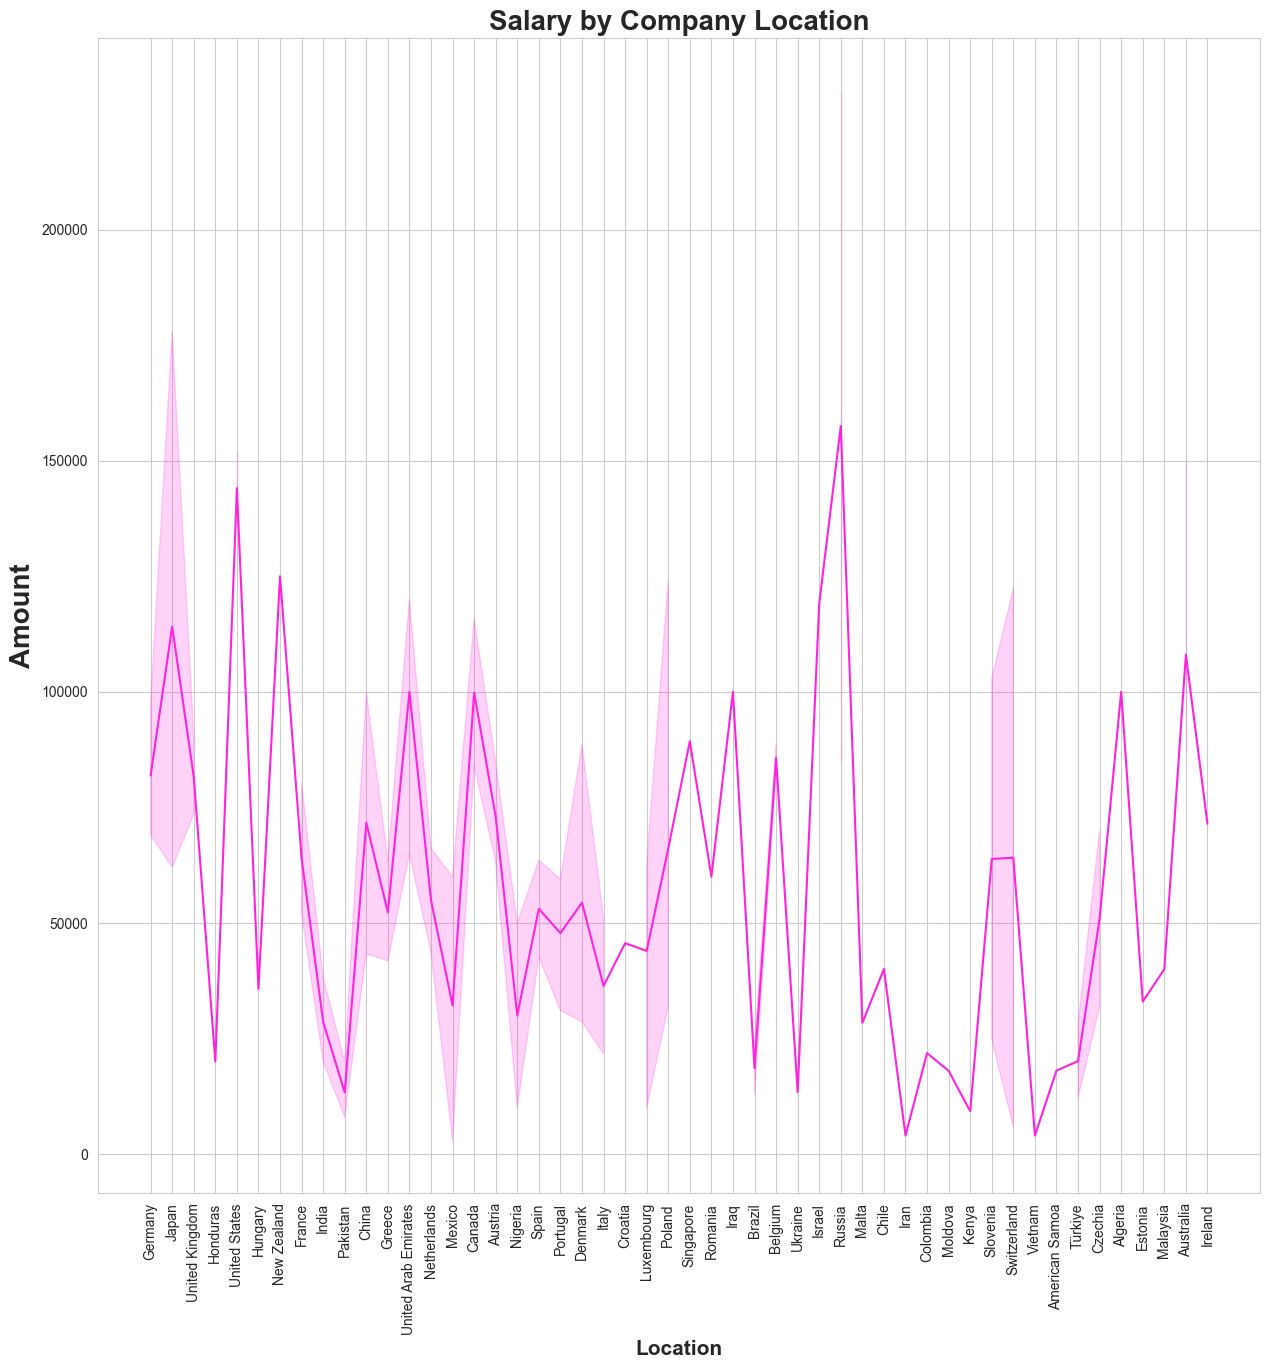

In [42]:
plt.figure(figsize=(15,15))
plt.title('Salary by Company Location', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='company_location', data=DS_job_salaries_data)
plt.xlabel('Location', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Correlations

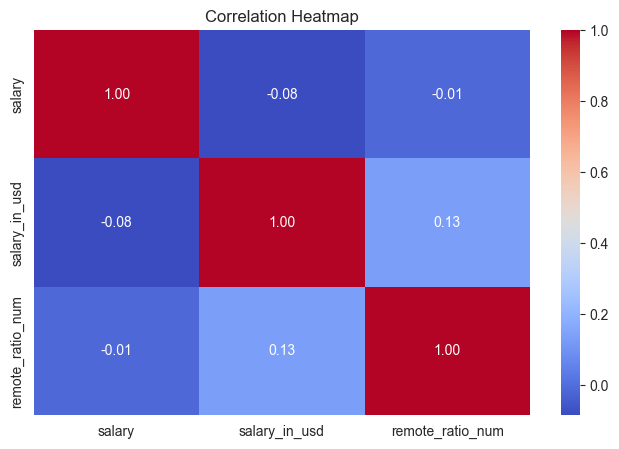

In [43]:
temp_data = DS_job_salaries_data.copy()
temp_data['remote_ratio_num'] = temp_data['job_type'].map({
    'onsite': 0,
    'hybrid': 50,
    'remote': 100
})

num_cols = temp_data[['salary', 'salary_in_usd', 'remote_ratio_num']]
corr = num_cols.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Summary

Most Data Science jobs require Senior-level/Expert experience level and very
few positions are available for Executive-level/Directors.

The most common job titles in the Data Science field are Data Scientist, Data Engineer, Data Analyst and Machine Learning Engineer.

Most positions are Full-time employment.

Most Data Science employees and Companies are resident in the United States. However, the location where the highest average salary is paid is Russia; followed closely by the United States.

The Number of Data Science jobs and the salary are increasing with each year and experience-level.

Medium-sized and Large-sized companies pay high salaries in comparison to small-sized companies.

The average salary for Data Science Jobs in USD is 144055.261972

In [44]:
# Assuming your cleaned DataFrame is named job_data or something similar
DS_job_salaries_data.to_csv('ds_job_salaries_cleaned.csv', index=False)

In [45]:
features = ['job_title', 'experience_level', 'employment_type', 'company_size',
            'employee_residence', 'company_location', 'job_type', 'work_year']
X = DS_job_salaries_data[features]
y = DS_job_salaries_data['salary_in_usd']

In [46]:
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_10284\2336363082.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

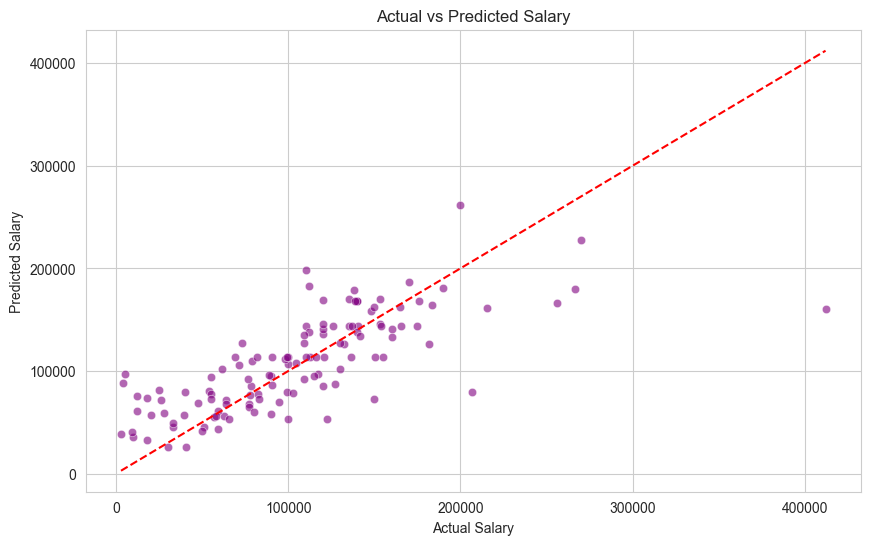

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.show()